Imports the lib

In [70]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imports for dataset
from sklearn.datasets import load_boston

In [71]:
# Load the dataset
boston = load_boston()

In [72]:
#show the dataset feature 
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Visualizing

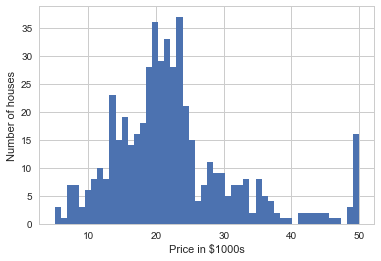

In [73]:
# Histogram of target = prices
plt.hist(boston.target,bins=50)

#label the axes
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Draw the scatter on one feature

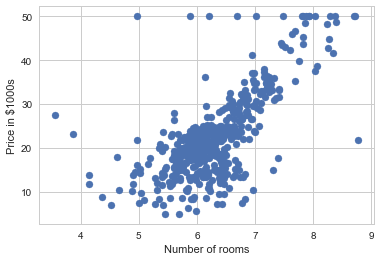

In [74]:
# Plot the column at the 5 index (Labeled RM)
# بدي اشوف علاق عدد الغرف بالسعر 
plt.scatter(boston.data[:,5],boston.target)

#label the axes
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

%بس مش 100 linearty في 

Use pandas to transform the boston dataset into a DataFrame

In [76]:
# reset data as pandas DataFrame
# outcome (target) صار عندي جدول بدون 
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

# add price column (target) into dataframe
boston_df['Price'] = boston.target

#show fisrt 5 rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


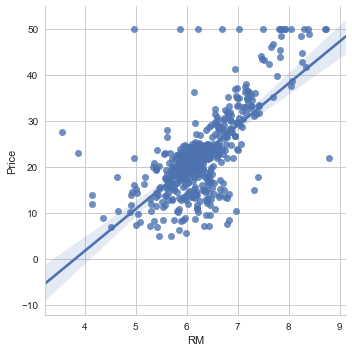

In [77]:
# Using seabron to create a linear fit
# dataframe و ال Yaxes (target) و Xaxes(att) بعطيه ال

sns.lmplot('RM','Price',data = boston_df)

!errors في سعر بالسالب ! في ==> sklearn بال linear model بدي اعمل 

In [78]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [79]:
# Call the LinearRegression ==> add it to variable 
lreg = LinearRegression()

fit the model with data .. وحدة as a packge يكونو att و ال taget مابدي ال ==>f بدي افصلهم

In [80]:
# Price حذفت ال
# att ضل ال 
X_multi = boston_df.drop('Price',1)

# لحالها price خزنت ال
Y_target = boston_df.Price

In [81]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
# (best fit التقاطع من ال) interceptبدي اطلع قيمة ال
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [83]:
# دخل بهاد التصنيف classification كم 
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [84]:

# Two column
# 1> Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# 2> coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [85]:
from sklearn.cross_validation import train_test_split
# set a testing and training data
# لحتى يقسملي ياهم ل 4 اشياء att و ال target اعطيته ال
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df.Price)

In [86]:
# Print the training and testing data
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


Know the target and the att ==> pridect the price 

In [87]:
# Create the regression obj
lreg = LinearRegression()

# fit the training set
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Calc. the mean square error

In [89]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 21.67
Fit a model X_train, and calculate MSE with X_test and Y_test: 23.02


Draw the Scatter plot

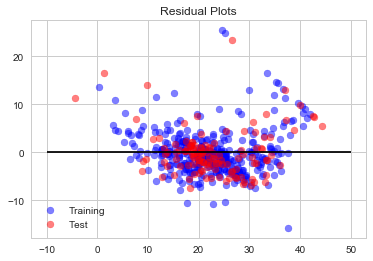

In [90]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Label thw axes
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')